In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Subplots

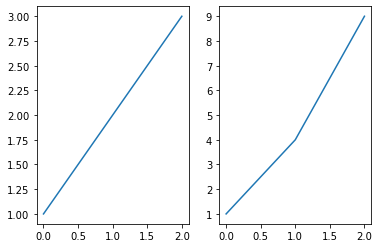

In [2]:
fig = plt.figure(2)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(data)
ax2.plot(x, data2)

plt.show()

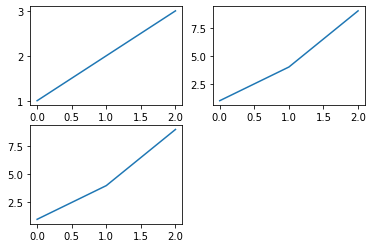

In [3]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2)


plt.show()

In [4]:
housing_raw = pd.read_csv("./housing_data.csv", 
                      parse_dates=["period_begin", "period_end"],
)

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin").sort_index()
)

ca_housing_pivot = ca_housing.pivot_table(index="period_begin",
                                          columns = "region_name",
                                          values = "median_active_list_price").assign(
                                          CA_average = lambda x: x.mean(axis=1))

ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco", 
                                              "Los Angeles", 
                                              "San Diego", 
                                              "Tulare"]]

ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


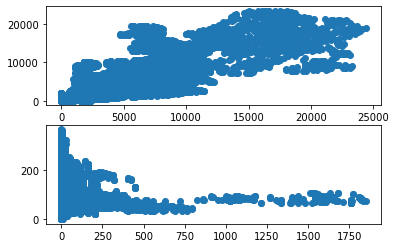

In [5]:
fig, ax = plt.subplots(2, 1)

ax[0].scatter(housing_raw.loc[:, "total_homes_sold"], housing_raw.loc[:, "inventory"])
ax[1].scatter(housing_raw.loc[:, "months_of_supply"], housing_raw.loc[:, "age_of_inventory"])

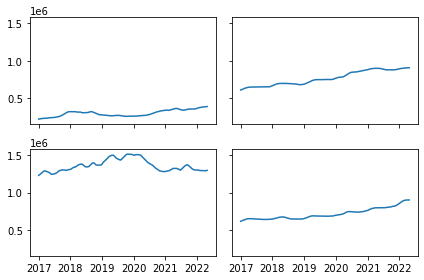

In [6]:
fig, ax = plt.subplots(2, 2, 
                       sharex='all', 
                       sharey="all"
                      )

ax[0][0].plot(ca_housing_markets.index, ca_housing_markets["Tulare"])
ax[0][1].plot(ca_housing_markets.index, ca_housing_markets["Los Angeles"])
ax[1][0].plot(ca_housing_markets.index, ca_housing_markets["San Francisco"])
ax[1][1].plot(ca_housing_markets.index, ca_housing_markets["San Diego"])

plt.tight_layout()

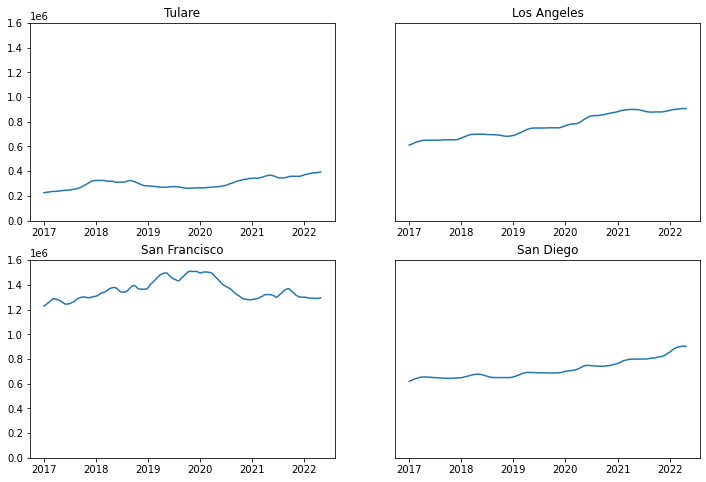

In [7]:
# Iterate and Add

fig = plt.figure(figsize=(12, 8))

plot_list = ["Tulare", "Los Angeles", "San Francisco", "San Diego"]

ax_list = []

nrows, ncols = (2, 2)

for i in range(1, len(plot_list) + 1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.plot(ca_housing_markets.index, ca_housing_markets[f"{plot_list[i-1]}"] )
    ax.set_ylim(0, 1600000)

    ax.set_title(f"{plot_list[i-1]}")
    ax_list.append(ax)
    
    if (i-1) % 2 != 0:
        ax.set_yticks([])
          
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

# GridSpec

In [8]:
from matplotlib.gridspec import GridSpec

diamonds = (
    pd.read_csv("./Diamonds Prices2022.csv")
    .drop(["Unnamed: 0"], axis=1)
)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


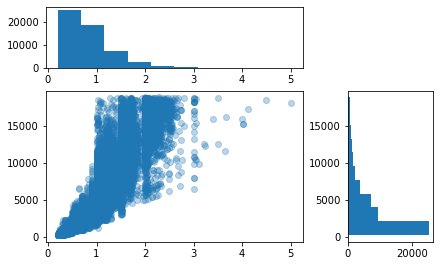

In [9]:
fig = plt.figure(constrained_layout=True)

grid = GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:7, 0:6])

ax1.scatter(
    diamonds["carat"], 
    diamonds["price"],
    alpha=.3
           )

ax2 = fig.add_subplot(grid[0:2, 0:6])

ax2.hist(diamonds["carat"])
ax3 = fig.add_subplot(grid[2:7, 6:])
ax3.hist(diamonds["price"],
        orientation="horizontal")

plt.show()

# Colors

In [10]:
data = [x for x in range(10)]
data2 = [x * 2 for x in range(10)]

In [11]:
# Change color cycler
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

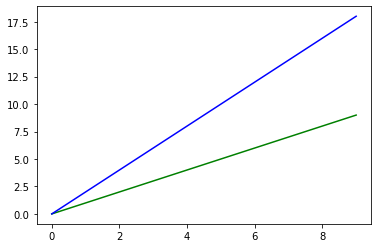

In [12]:
color_list = ["green", "red"]

fig, ax = plt.subplots()

ax.plot(
    data, 
    c="green" #hexcodes are also valid
)

ax.plot(
    data2, 
    c="blue"
)

plt.show()

# Style Sheets

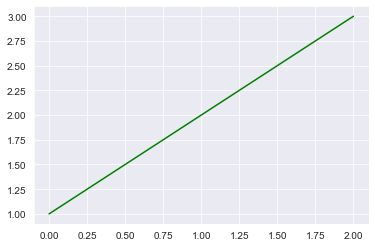

In [13]:
# plt.style.use("ggplot")
# plt.style.use("Solarize_Light2")

import seaborn as sns
sns.set_style("darkgrid")

plt.plot([1, 2, 3], c="green")

# rcParams

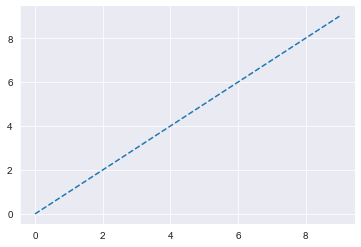

In [14]:
plt.rc("axes.spines", top=False, right=False)
plt.rcParams["lines.linestyle"] = "--"

fig, ax = plt.subplots()

ax.plot(data)

In [15]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        